## Aluno: Caio Dib Laronga
## Prontuário: Gu3042294
## Disciplina: Aprendizado de Máquina


In [2]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, StackingRegressor, KNeighborsRegressor



<h1 style="color:gray;">Especificando os tipos dos atributos ao abrir o DataFrame, observa-se que "vendas" está no formato brasileiro (vírgula) e classificada como <i>object</i>, exigindo tratamento.</h1>


In [4]:
#Ao todo temos 6 atributos
tipos_de_dados = {
    'ANO': int,
    'MÊS': str,  
    'GRANDE REGIÃO': str,
    'UNIDADE DA FEDERAÇÃO': str,
    'PRODUTO': str,
    'VENDAS': float #passo direto como float ao abrir  
} 


In [5]:
df = pd.read_csv('vendas-combustiveis-m3-1990-2024.csv', sep=';',  dtype=tipos_de_dados, decimal=',')


<h1 style="color:gray;">Dataframe Original</h1>


In [7]:
df

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,29876.051
1,1990,SET,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,20544.692
2,1990,OUT,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,15368.064
3,1990,NOV,REGIÃO CENTRO-OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,34415.728
4,1990,FEV,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,21750.741
...,...,...,...,...,...,...
90067,2024,ABR,REGIÃO NORTE,RORAIMA,ÓLEO DIESEL,26055.810
90068,2024,ABR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,105345.100
90069,2024,MAR,REGIÃO NORTE,TOCANTINS,ÓLEO DIESEL,107549.707
90070,2024,JUL,REGIÃO NORTE,AMAZONAS,ÓLEO DIESEL,91205.356


<h1 style="color:gray;">Análise Exploratória</h1


### -Nota-se uma desigualdade de vendas por região

<Axes: title={'center': 'Distribuição de Vendas por Região'}, xlabel='GRANDE REGIÃO'>

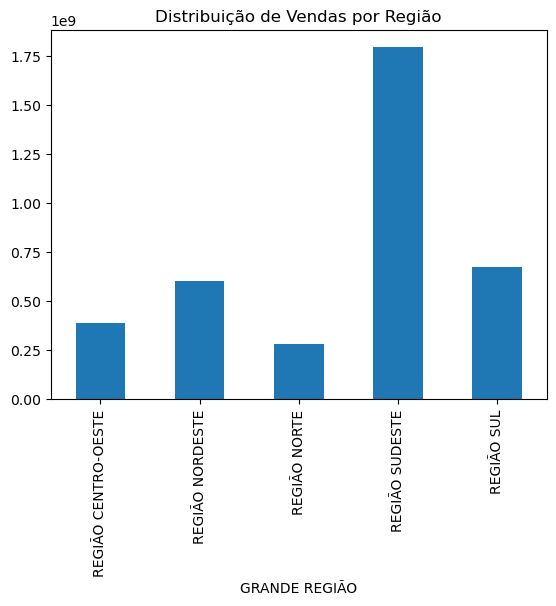

In [10]:
df.groupby('GRANDE REGIÃO')['VENDAS'].sum().plot(kind='bar', title='Distribuição de Vendas por Região')


### -Nota-se uma desigualdade na distribuição de vendas

<Axes: title={'center': 'Vendas por Combustível e Região'}, xlabel='GRANDE REGIÃO'>

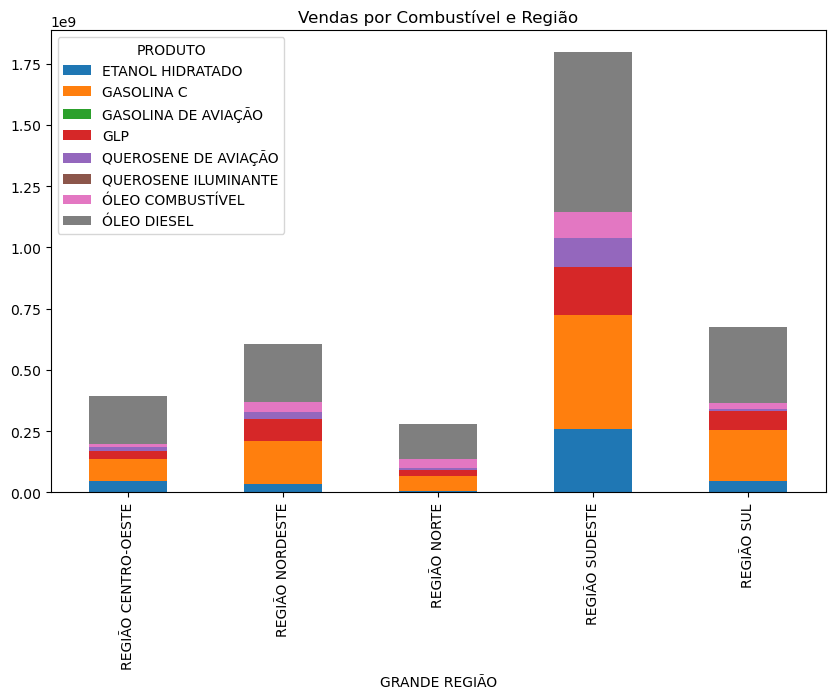

In [12]:
vendas_por_produto_regiao = df.groupby(['GRANDE REGIÃO', 'PRODUTO'])['VENDAS'].sum().unstack()
vendas_por_produto_regiao.plot(kind='bar', stacked=True, figsize=(10, 6), title='Vendas por Combustível e Região')


In [13]:
print(f'Colunas do DataFrame Original:\n\n{df.columns}')

Colunas do DataFrame Original:

Index(['ANO', 'MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO',
       'VENDAS'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90072 entries, 0 to 90071
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ANO                   90072 non-null  int32  
 1   MÊS                   90072 non-null  object 
 2   GRANDE REGIÃO         90072 non-null  object 
 3   UNIDADE DA FEDERAÇÃO  90072 non-null  object 
 4   PRODUTO               90072 non-null  object 
 5   VENDAS                90072 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 3.8+ MB


In [15]:
df.isnull().sum()

ANO                     0
MÊS                     0
GRANDE REGIÃO           0
UNIDADE DA FEDERAÇÃO    0
PRODUTO                 0
VENDAS                  0
dtype: int64

In [16]:
df.nunique()

ANO                        35
MÊS                        12
GRANDE REGIÃO               5
UNIDADE DA FEDERAÇÃO       27
PRODUTO                     8
VENDAS                  78740
dtype: int64

In [17]:
df.dtypes

ANO                       int32
MÊS                      object
GRANDE REGIÃO            object
UNIDADE DA FEDERAÇÃO     object
PRODUTO                  object
VENDAS                  float64
dtype: object

In [18]:
df.duplicated().sum()

0

In [19]:
produtos_unicos = df['PRODUTO'].unique()

print(produtos_unicos)


['ETANOL HIDRATADO' 'GASOLINA C' 'GASOLINA DE AVIAÇÃO' 'GLP'
 'QUEROSENE DE AVIAÇÃO' 'QUEROSENE ILUMINANTE' 'ÓLEO COMBUSTÍVEL'
 'ÓLEO DIESEL']


<h1 style="color:gray;">Contando a ocorrência de cada valor</h1>


In [21]:
conta_produtos = df['PRODUTO'].value_counts()
conta_produtos

PRODUTO
ETANOL HIDRATADO        11259
GASOLINA C              11259
GASOLINA DE AVIAÇÃO     11259
GLP                     11259
QUEROSENE DE AVIAÇÃO    11259
QUEROSENE ILUMINANTE    11259
ÓLEO COMBUSTÍVEL        11259
ÓLEO DIESEL             11259
Name: count, dtype: int64

In [22]:
conta_produtos = df['PRODUTO'].value_counts()
conta_produtos

PRODUTO
ETANOL HIDRATADO        11259
GASOLINA C              11259
GASOLINA DE AVIAÇÃO     11259
GLP                     11259
QUEROSENE DE AVIAÇÃO    11259
QUEROSENE ILUMINANTE    11259
ÓLEO COMBUSTÍVEL        11259
ÓLEO DIESEL             11259
Name: count, dtype: int64

In [23]:
conta_vendas = df['VENDAS'].value_counts()
conta_vendas

VENDAS
0.000         6605
10.000         273
5.000          249
15.000         213
20.000         165
              ... 
1762.316         1
1846.196         1
2196.345         1
1695.980         1
111733.400       1
Name: count, Length: 78740, dtype: int64

In [24]:
conta_ano = df['ANO'].value_counts()
conta_ano

ANO
1990    2592
2016    2592
2010    2592
2011    2592
2012    2592
2013    2592
2014    2592
2015    2592
2017    2592
2008    2592
2018    2592
2019    2592
2020    2592
2021    2592
2022    2592
2023    2592
2009    2592
2007    2592
1991    2592
1998    2592
1992    2592
1993    2592
1994    2592
1995    2592
1996    2592
1997    2592
1999    2592
2006    2592
2000    2592
2001    2592
2002    2592
2003    2592
2004    2592
2005    2592
2024    1944
Name: count, dtype: int64

# Legenda de Cores

Cada região será representada por uma cor:

| Dataframe       | Cor            | Amostra de Cor              |
|--------------|------------------ |-----------------------------|
| Original      | Cinza            | ![#808080](https://via.placeholder.com/15/808080/000000?text=+) |
| Sudeste       | Roxa             | ![#800080](https://via.placeholder.com/15/800080/000000?text=+) |
| Nordeste      | Laranja          | ![#FFA500](https://via.placeholder.com/15/FFA500/000000?text=+) |


<h1 style="color:gray;">Quebrando o Dataframe original por regiões</h1>
<ul style="color:gray;">
    <li>Como os dataframes fragmentados são parte de um todo, a análise exploratória é válida para seus fragmentos.</li>
</ul>


In [27]:
df_sudeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO SUDESTE']
df_norte = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO NORTE']
df_nordeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO NORDESTE']
df_sul = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO SUL']
df_centro_oeste = df.loc[df['GRANDE REGIÃO'] == 'REGIÃO CENTRO-OESTE']

<h1 style="color:purple;">Pré- processamento - Região Sudeste</h1>


In [29]:
df_sudeste

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
70,1990,JAN,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,428709.796
81,1990,ABR,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,94384.290
82,1990,JUN,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO,75867.971
93,1990,DEZ,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,419651.950
94,1990,NOV,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO,485676.100
...,...,...,...,...,...,...
89943,2024,JUL,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,788296.564
89944,2024,AGO,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,778885.317
89945,2024,SET,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL,737505.601
89946,2024,SET,REGIÃO SUDESTE,SÃO PAULO,ÓLEO DIESEL,1187516.445


<h1 style="color:purple;">Explorando e entendendo a média de vendas total da Região Sudeste</h1>


In [31]:
media_vendas_sudeste = df_sudeste['VENDAS'].mean()

print(f"Média de vendas na Região Sudeste: {media_vendas_sudeste:.2f} m³")


Média de vendas na Região Sudeste: 134584.43 m³


<h1 style="color:purple;">Dividindo o DF Sudeste em categórico e numérico</h1>


In [33]:
df_categorico_sudeste = df_sudeste.select_dtypes(include=['object'])
df_numerico_sudeste = df_sudeste.select_dtypes(include=['number'])

<h1 style="color:purple;">Sudeste - Categórico</h1>


In [35]:
df_categorico_sudeste

,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO
70,JAN,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
81,ABR,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO
82,JUN,REGIÃO SUDESTE,MINAS GERAIS,ETANOL HIDRATADO
93,DEZ,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
94,NOV,REGIÃO SUDESTE,SÃO PAULO,ETANOL HIDRATADO
...,...,...,...,...
89943,JUL,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89944,AGO,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89945,SET,REGIÃO SUDESTE,MINAS GERAIS,ÓLEO DIESEL
89946,SET,REGIÃO SUDESTE,SÃO PAULO,ÓLEO DIESEL


In [36]:
print(f'Sudeste  - Colunas do DataFrame Categórico:\n\n{df_categorico_sudeste.columns}')

Sudeste  - Colunas do DataFrame Categórico:

Index(['MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO'], dtype='object')


<h1 style="color:purple;">Sudeste - Numérico</h1>


In [38]:
df_numerico_sudeste

,ANO,VENDAS
70,1990,428709.796
81,1990,94384.290
82,1990,75867.971
93,1990,419651.950
94,1990,485676.100
...,...,...
89943,2024,788296.564
89944,2024,778885.317
89945,2024,737505.601
89946,2024,1187516.445


In [39]:
print(f'Sudeste  - Colunas do DataFrame Numérico:\n\n{df_numerico_sudeste.columns}')

Sudeste  - Colunas do DataFrame Numérico:

Index(['ANO', 'VENDAS'], dtype='object')


<h1 style="color:purple;">Transformando variáveis categóricas</h1>


<h1 style="color:purple;">One-Hot Encoding para PRODUTO, GRANDE REGIÃO,UNIDADE DE FEDERAÇÃO, MÊS</h1>


In [42]:
# One-Hot Encoding para PRODUTO e outras categorias
df_sudeste = df_sudeste.drop(columns=["GRANDE REGIÃO"])

df_sudeste = pd.get_dummies(df_sudeste  , columns=['PRODUTO'], drop_first=False)
#df_sudeste = pd.get_dummies(df_sudeste , columns=['GRANDE REGIÃO'], drop_first=False)
df_sudeste = pd.get_dummies(df_sudeste , columns=['UNIDADE DA FEDERAÇÃO'], drop_first=False)
df_sudeste = pd.get_dummies(df_sudeste , columns=['MÊS'], drop_first=False)

In [43]:
df_sudeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
70,1990,428709.796,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81,1990,94384.290,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
93,1990,419651.950,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
94,1990,485676.100,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89943,2024,788296.564,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89944,2024,778885.317,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89945,2024,737505.601,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
89946,2024,1187516.445,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [44]:
print(f'Sudeste  - Colunas transformadas:\n\n{df_sudeste.columns}')

Sudeste  - Colunas transformadas:

Index(['ANO', 'VENDAS', 'PRODUTO_ETANOL HIDRATADO', 'PRODUTO_GASOLINA C',
       'PRODUTO_GASOLINA DE AVIAÇÃO', 'PRODUTO_GLP',
       'PRODUTO_QUEROSENE DE AVIAÇÃO', 'PRODUTO_QUEROSENE ILUMINANTE',
       'PRODUTO_ÓLEO COMBUSTÍVEL', 'PRODUTO_ÓLEO DIESEL',
       'UNIDADE DA FEDERAÇÃO_ESPÍRITO SANTO',
       'UNIDADE DA FEDERAÇÃO_MINAS GERAIS',
       'UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO', 'UNIDADE DA FEDERAÇÃO_SÃO PAULO',
       'MÊS_ABR', 'MÊS_AGO', 'MÊS_DEZ', 'MÊS_FEV', 'MÊS_JAN', 'MÊS_JUL',
       'MÊS_JUN', 'MÊS_MAI', 'MÊS_MAR', 'MÊS_NOV', 'MÊS_OUT', 'MÊS_SET'],
      dtype='object')


In [45]:
df_sudeste

,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
70,1990,428709.796,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81,1990,94384.290,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
93,1990,419651.950,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
94,1990,485676.100,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89943,2024,788296.564,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
89944,2024,778885.317,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
89945,2024,737505.601,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
89946,2024,1187516.445,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


<h1 style="color:purple;">Outliers</h1>


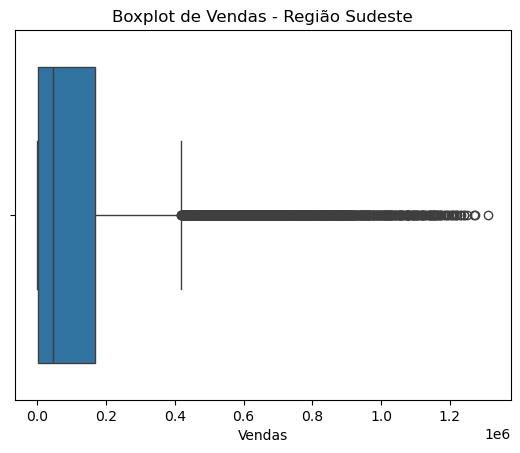

In [47]:
sns.boxplot(x=df_sudeste['VENDAS'])

plt.title('Boxplot de Vendas - Região Sudeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:purple;">Removendo outliers utlizando o método IQR</h1>


In [49]:
#Remoção de Outliers

df_sudeste_sem_outliers = df_sudeste.copy()

Q1 = df['VENDAS'].quantile(0.25)  
Q3 = df['VENDAS'].quantile(0.75)  
IQR = Q3 - Q1 


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


df_sudeste_sem_outliers = df_sudeste_sem_outliers[
    (df_sudeste_sem_outliers['VENDAS'] >= limite_inferior) & 
    (df_sudeste_sem_outliers['VENDAS'] <= limite_superior)
]

# 
#print("Limite Inferior:", limite_inferior)
#print("Limite Superior:", limite_superior)



In [50]:
print("DataFrame sem outliers - Sudeste")
df_sudeste_sem_outliers #chamar df_sem_outliers caso precise

DataFrame sem outliers - Sudeste


,ANO,VENDAS,PRODUTO_ETANOL HIDRATADO,PRODUTO_GASOLINA C,PRODUTO_GASOLINA DE AVIAÇÃO,PRODUTO_GLP,PRODUTO_QUEROSENE DE AVIAÇÃO,PRODUTO_QUEROSENE ILUMINANTE,PRODUTO_ÓLEO COMBUSTÍVEL,PRODUTO_ÓLEO DIESEL,...,MÊS_DEZ,MÊS_FEV,MÊS_JAN,MÊS_JUL,MÊS_JUN,MÊS_MAI,MÊS_MAR,MÊS_NOV,MÊS_OUT,MÊS_SET
82,1990,75867.971,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
95,1990,15894.412,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
96,1990,14465.835,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
106,1990,19296.257,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
110,1990,77316.958,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89685,2024,10852.238,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
89738,2024,921.900,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
89742,2024,14323.215,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
89743,2024,2422.000,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


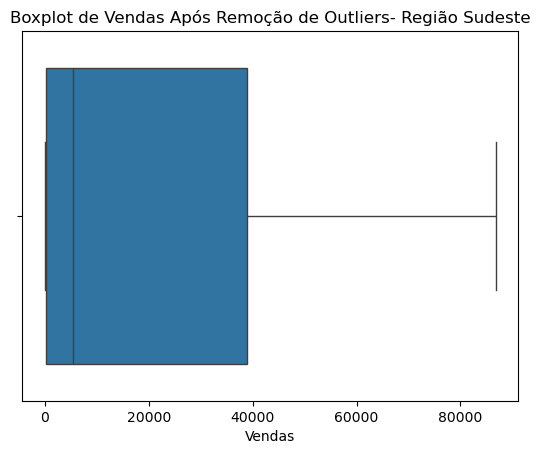

In [51]:
sns.boxplot(x=df_sudeste_sem_outliers['VENDAS'])

plt.title('Boxplot de Vendas Após Remoção de Outliers- Região Sudeste')
plt.xlabel('Vendas')
plt.show()


<h1 style="color:purple;"> Calcular a matriz de correlação (sem gráfico)</h1>


<h2 style="color:purple;">Sem outliers - Correlação</h2>


In [54]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_sudeste_sem_outliers.corr()

print("Sudeste - Top 10 correlações com VENDAS (sem outliers):\n")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nSudeste - Top 10 correlações negativas com VENDAS(sem outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Sudeste - Top 10 correlações com VENDAS (sem outliers):

VENDAS                                 1.000000
PRODUTO_GLP                            0.325491
PRODUTO_ÓLEO DIESEL                    0.273362
UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO    0.234099
PRODUTO_GASOLINA C                     0.230837
PRODUTO_ETANOL HIDRATADO               0.172300
PRODUTO_ÓLEO COMBUSTÍVEL               0.095214
PRODUTO_QUEROSENE DE AVIAÇÃO           0.034483
MÊS_JAN                                0.008018
MÊS_SET                                0.007901
Name: VENDAS, dtype: float64

Sudeste - Top 10 correlações negativas com VENDAS(sem outliers):
MÊS_AGO                               -0.007800
MÊS_JUN                               -0.008161
MÊS_JUL                               -0.010247
MÊS_DEZ                               -0.012171
UNIDADE DA FEDERAÇÃO_MINAS GERAIS     -0.030598
UNIDADE DA FEDERAÇÃO_ESPÍRITO SANTO   -0.076367
ANO                                   -0.119980
UNIDADE DA FEDERAÇÃO_SÃO PAULO  

<h2 style="color:purple;">Com outliers - Correlação</h2>


In [56]:
# Calcular a matriz de correlação SEM outliers
corr_matrix = df_sudeste.corr()

print("Top 10 correlações com VENDAS (com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).head(10))

print("\nTop 10 correlações negativas com VENDAS(com outliers):")
print(corr_matrix['VENDAS'].sort_values(ascending=False).tail(10))


Top 10 correlações com VENDAS (com outliers):
VENDAS                            1.000000
UNIDADE DA FEDERAÇÃO_SÃO PAULO    0.496852
PRODUTO_ÓLEO DIESEL               0.451501
PRODUTO_GASOLINA C                0.251292
ANO                               0.107559
PRODUTO_ETANOL HIDRATADO          0.038082
MÊS_AGO                           0.011946
MÊS_OUT                           0.009641
MÊS_JUL                           0.007089
MÊS_DEZ                           0.006191
Name: VENDAS, dtype: float64

Top 10 correlações negativas com VENDAS(com outliers):
MÊS_JAN                               -0.011856
MÊS_FEV                               -0.019950
UNIDADE DA FEDERAÇÃO_MINAS GERAIS     -0.028582
PRODUTO_GLP                           -0.029295
PRODUTO_QUEROSENE DE AVIAÇÃO          -0.113806
PRODUTO_ÓLEO COMBUSTÍVEL              -0.127106
UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO   -0.166442
PRODUTO_QUEROSENE ILUMINANTE          -0.234809
PRODUTO_GASOLINA DE AVIAÇÃO           -0.235860
UNIDADE

<h2 style="color:purple;">Treinamento</h2>


<h2 style="color:purple;">Regressão Linear</h2>


In [59]:
%%time

# Variáveis com maior correlação 
#PRODUTO_GLP                            0.325491
#PRODUTO_ÓLEO DIESEL                    0.273362
#UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO    0.234099
#PRODUTO_GASOLINA C                     0.230837
#PRODUTO_ETANOL HIDRATADO               0.172300

X = df_sudeste_sem_outliers[['PRODUTO_GLP', 
        'PRODUTO_ÓLEO DIESEL', 
        'UNIDADE DA FEDERAÇÃO_RIO DE JANEIRO', 
        'PRODUTO_GASOLINA C',  
        'PRODUTO_ETANOL HIDRATADO']]  


y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predicao = model.predict(X_test)

mse = mean_squared_error(y_test, predicao)
r2 = r2_score(y_test, predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicao)

print("\nSudeste - Regressão Linear - Métricas sem outliers\n")
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}\n')

print(f'Tempo decorrido:')


#print(f"Tamanho de predicao: {len(predicao)}")
#print(f"Tamanho de y_test: {len(y_test)}")


Sudeste - Regressão Linear - Métricas sem outliers

Erro Quadrático Médio (MSE): 450318862.0402548
Coeficiente de Determinação (R²): 0.40 -> 40.21%
Root Mean Squared Error (RMSE): 21220.72
Mean Absolute Error (MAE): 16805.14

Tempo decorrido:
CPU times: total: 31.2 ms
Wall time: 21.7 ms


<h2 style="color:purple;">Árvore Decisão</h2>


In [61]:
%%time
#árvore de decisão
X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeRegressor(criterion='squared_error')
dtree.fit(X_train, y_train)

predicao = dtree.predict(X_test)


mse = mean_squared_error(y_test, predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicao)
r2 = r2_score(y_test, predicao)

print(f"Sudeste - Árvore de decisão - Sem Outliers:\n")

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")


#print(f"Tamanho de predicao: {len(predicao)}")
#print(f"Tamanho de y_test: {len(y_test)}")



Sudeste - Árvore de decisão - Sem Outliers:

Erro Quadrático Médio (MSE): 29233347.98
Root Mean Squared Error (RMSE): 5406.79
Mean Absolute Error (MAE): 2545.65
Coeficiente de Determinação (R²): 0.96 -> 96.07%

Tempo decorrido:

CPU times: total: 78.1 ms
Wall time: 56.3 ms


<h2 style="color:purple;">Floresta Aleatória</h2>


In [63]:
%%time
# Floresta Aleatória
X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_predicao = rfc.predict(X_test)

mse = mean_squared_error(y_test, rfc_predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rfc_predicao)
r2 = r2_score(y_test, rfc_predicao)

print(f"Sudeste - Floresta Aleatória - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")

#print(f"Tamanho de rfc_predicao: {len(rfc_predicao)}")
#print(f"Tamanho de y_test: {len(y_test)}")

Sudeste - Floresta Aleatória - Sem Outliers:

Erro Quadrático Médio (MSE): 19365195.78
Root Mean Squared Error (RMSE): 4400.59
Mean Absolute Error (MAE): 2056.36
Coeficiente de Determinação (R²): 0.97 -> 97.40%

Tempo decorrido:

CPU times: total: 2.59 s
Wall time: 3.1 s


<h1 style="color:purple;">Floresta Aleatória</h1>


In [65]:
%%time
# Floresta Aleatória
X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_predicao = rfc.predict(X_test)

mse = mean_squared_error(y_test, rfc_predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rfc_predicao)
r2 = r2_score(y_test, rfc_predicao)

print(f"Sudeste - Floresta Aleatória - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")

#print(f"Tamanho de rfc_predicao: {len(rfc_predicao)}")
#print(f"Tamanho de y_test: {len(y_test)}")

Sudeste - Floresta Aleatória - Sem Outliers:

Erro Quadrático Médio (MSE): 19558641.07
Root Mean Squared Error (RMSE): 4422.52
Mean Absolute Error (MAE): 2058.20
Coeficiente de Determinação (R²): 0.97 -> 97.37%

Tempo decorrido:

CPU times: total: 2.55 s
Wall time: 3.07 s


<h1 style="color:purple;">Gradient Boosting Regressor</h1>
<p style="color:black;">Os parâmetros do modelo foram ajustados para <strong>n_estimators=200</strong> e <strong>max_depth=6</strong>, a fim de alcançar uma melhor performance, reduzindo os erros de previsão e aumentando a precisão do modelo.</p>


In [67]:
%%time

X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

gbr.fit(X_train, y_train)

gbr_predicao = gbr.predict(X_test)

mse = mean_squared_error(y_test, gbr_predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gbr_predicao)
r2 = r2_score(y_test, gbr_predicao)

print(f"Sudeste - Gradient Boosting - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")


Sudeste - Gradient Boosting - Sem Outliers:

Erro Quadrático Médio (MSE): 18530037.68
Root Mean Squared Error (RMSE): 4304.65
Mean Absolute Error (MAE): 2308.75
Coeficiente de Determinação (R²): 0.98 -> 97.51%

CPU times: total: 2.12 s
Wall time: 3.42 s


<h1 style="color:purple;">Ada Boost</h1>
<p style="color:black;">
O AdaBoost, por padrão, usa árvores de decisão bem simples, com profundidade máxima (<strong>max_depth</strong>) de apenas <strong>1</strong>. Isso acaba sendo um problema para o nosso dataset, porque ele não consegue capturar padrões mais complexos. Para melhorar, seria necessário ajustar o modelo base, mas mesmo assim o AdaBoost pode não ser a melhor escolha para esse caso.</p>


In [69]:
%%time

X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

adaboost = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

adaboost.fit(X_train, y_train)

adaboost_predicao = adaboost.predict(X_test)

mse = mean_squared_error(y_test, adaboost_predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, adaboost_predicao)
r2 = r2_score(y_test, adaboost_predicao)

print(f"Sudeste - AdaBoost - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")



Sudeste - AdaBoost - Sem Outliers:

Erro Quadrático Médio (MSE): 363443440.19
Root Mean Squared Error (RMSE): 19064.19
Mean Absolute Error (MAE): 13189.38
Coeficiente de Determinação (R²): 0.51 -> 51.14%

Tempo decorrido:

CPU times: total: 641 ms
Wall time: 828 ms


<h1 style="color:purple;">Bagging Regressor</h1>


In [71]:
%%time
#BaggingRegressor

X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# dependendo da versão do sklearn, ao inves de ser base estimator é só estimator
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), 
                           n_estimators=100, 
                           random_state=42)

bagging.fit(X_train, y_train)

predicao = bagging.predict(X_test)

mse = mean_squared_error(y_test, predicao)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicao)
r2 = r2_score(y_test, predicao)

print(f"Região Sudeste - Bagging Regressor - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")



Região Sudeste - Bagging Regressor - Sem Outliers:

Erro Quadrático Médio (MSE): 19523860.82
Root Mean Squared Error (RMSE): 4418.58
Mean Absolute Error (MAE): 2064.47
Coeficiente de Determinação (R²): 0.97 -> 97.38%

Tempo decorrido:

CPU times: total: 2.64 s
Wall time: 2.98 s


<h1 style="color:purple;">KNN</h1>


In [139]:
%%time
#KNN
X = df_sudeste_sem_outliers.drop(columns=['VENDAS']) 
y = df_sudeste_sem_outliers['VENDAS']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Usando 5 vizinhos como padrão

knn_regressor.fit(X_train, y_train)

predicao = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, predicao)
mae = mean_absolute_error(y_test, predicao)
r2 = r2_score(y_test, predicao)
print(f"Região Sudeste - KNN - Sem Outliers:\n")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f} -> {r2 * 100:.2f}%\n")
print(f"Tempo decorrido:\n")




Região Sudeste - KNN - Sem Outliers:

Erro Quadrático Médio (MSE): 139080342.87
Root Mean Squared Error (RMSE): 4418.58
Mean Absolute Error (MAE): 7632.90
Coeficiente de Determinação (R²): 0.81 -> 81.30%

Tempo decorrido:

CPU times: total: 609 ms
Wall time: 2.5 s
